https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [353]:
import pandas as pd

In [354]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [356]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [357]:
# unicos
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [358]:
# valores
df['week'].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [359]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df[['week']])

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

In [360]:
# dummies
df_dummies = pd.get_dummies(df['week'], dtype=int)
df_dummies

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


#### Es mejor cuando usamos un mapeo con datos ciclicos, con seno y coseno

In [361]:
mapeo = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}
df['week'] = df['week'].map(mapeo)

In [362]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [363]:
# agurpar por mes y quedarse con la media de la columna temp_1
df_temp = df.groupby(by = 'month', as_index=False).mean()[['month', 'temp_1']]

In [364]:
df_temp

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [365]:
# merge del dataframe anterior con el original
df = pd.merge(df, df_temp, on= 'month')

In [366]:
df

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


In [367]:
import seaborn as sns

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

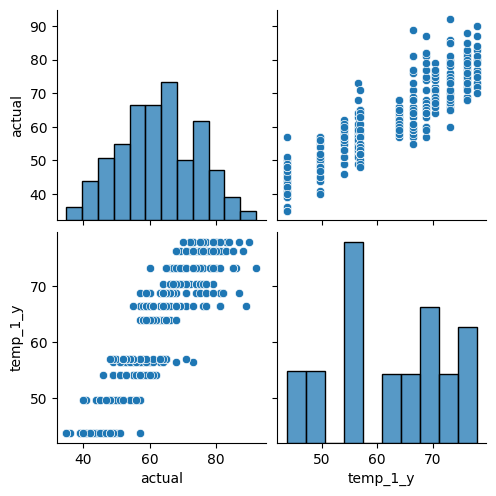

In [368]:
sns.pairplot(df[['actual', 'temp_1_y']])

In [369]:
import matplotlib.pyplot as plt

In [370]:
import matplotlib.pyplot as plt
def grafico_heatmap(data):
    '''Función para graficar en un mapa de calor mostrando las correlaciones entre las variables'''
    try:
        plt.figure(figsize=(10,10))
        sns.heatmap(data.corr(numeric_only=True), robust=True, 
                    square = True, linewidths = 0.3, annot=True)      
    except Exception as a:
        print(f"No pude hacer el gráfico por {a}")

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


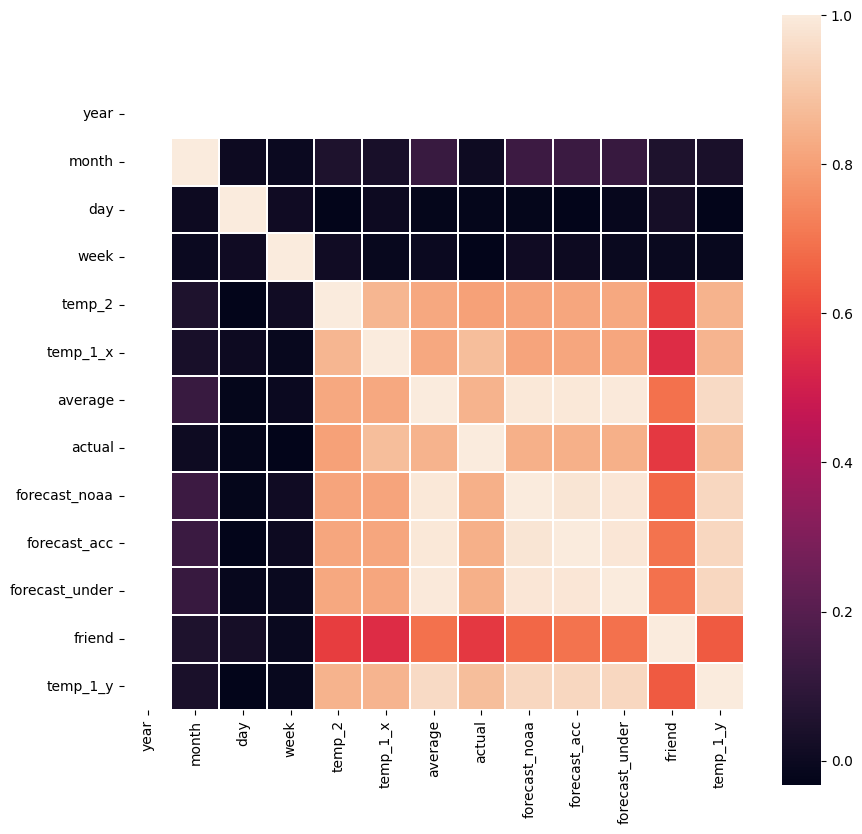

In [371]:
grafico_heatmap(df)

In [372]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    media_color = 'r'
    mediana_color = 'b'
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, bins = 50)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: year



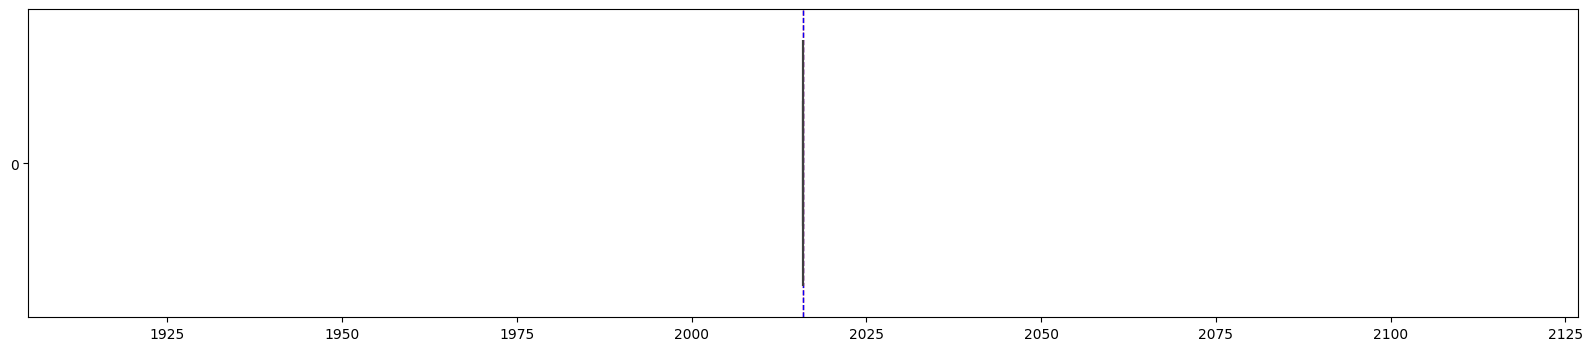

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


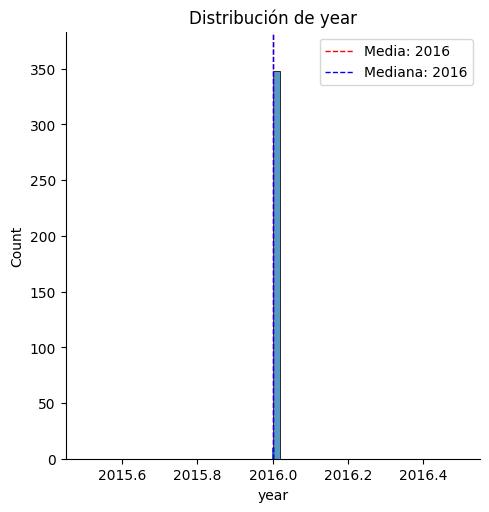

count     348.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: year, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: month



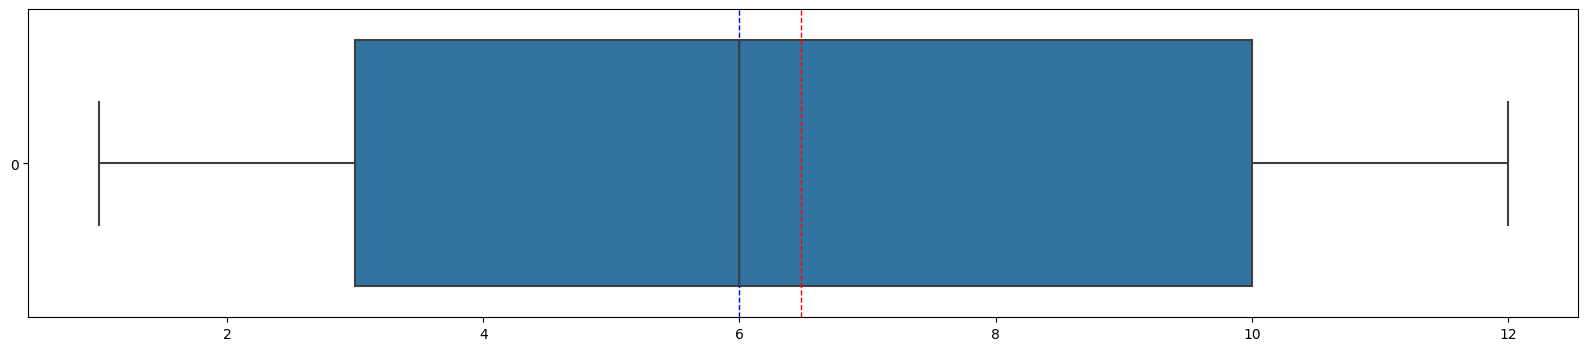

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


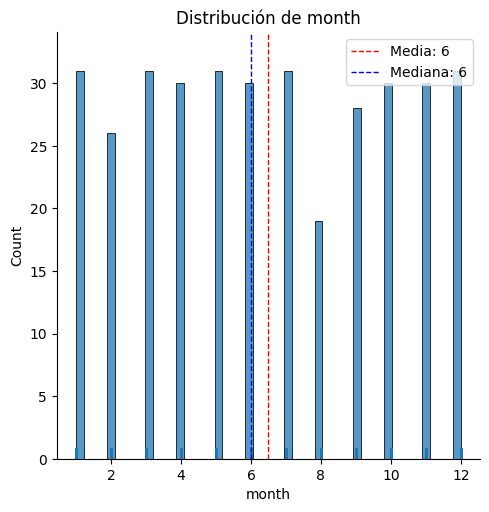

count    348.0
mean       6.0
std        3.0
min        1.0
25%        3.0
50%        6.0
75%       10.0
max       12.0
Name: month, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: day



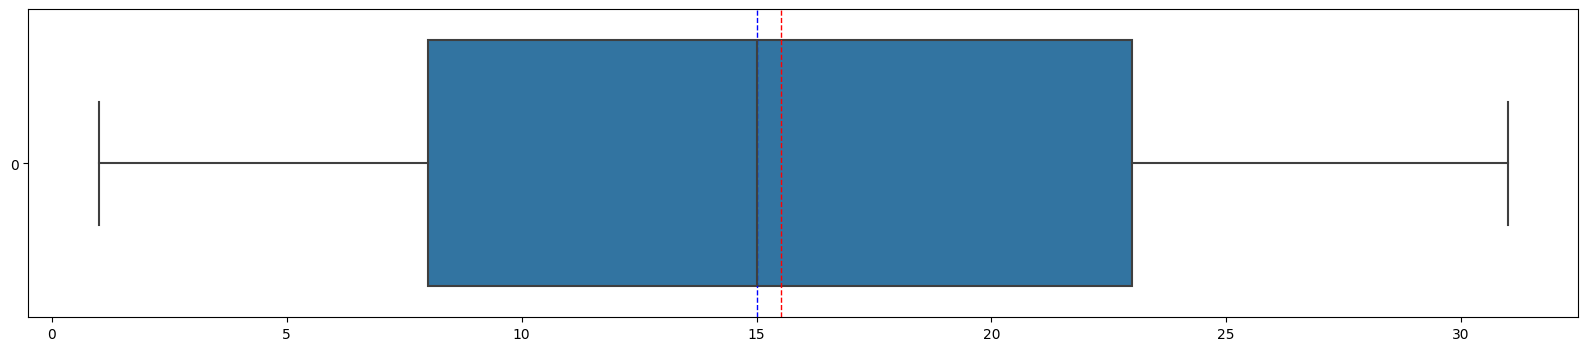

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


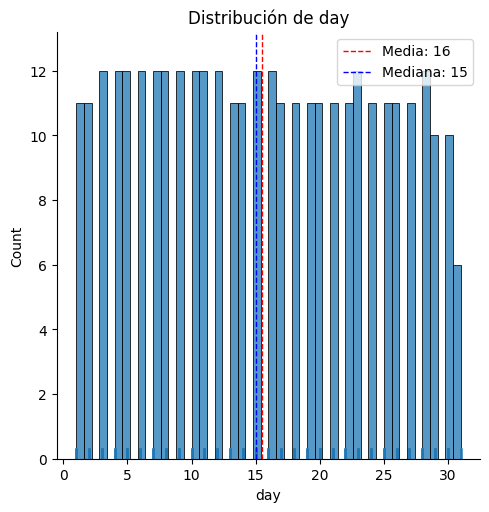

count    348.0
mean      16.0
std        9.0
min        1.0
25%        8.0
50%       15.0
75%       23.0
max       31.0
Name: day, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: week



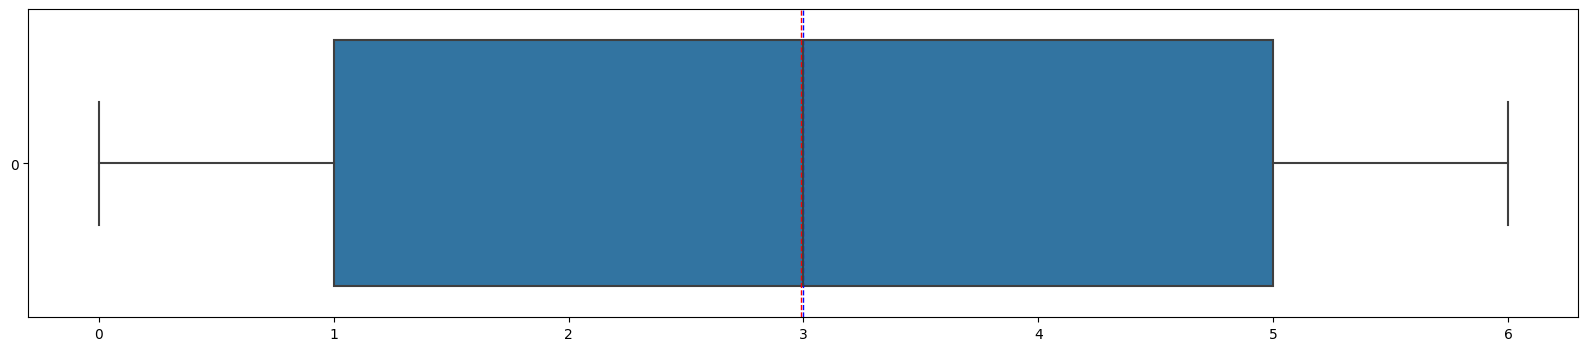

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


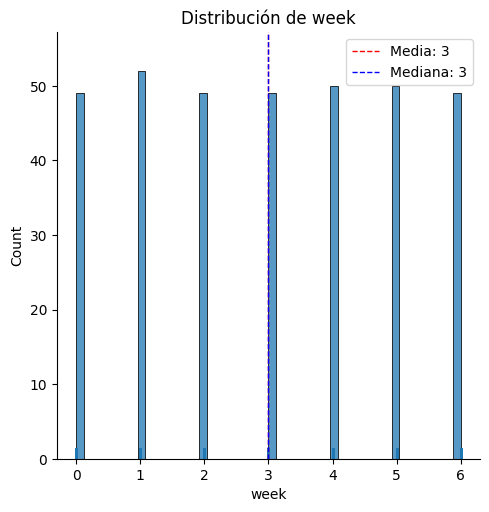

count    348.0
mean       3.0
std        2.0
min        0.0
25%        1.0
50%        3.0
75%        5.0
max        6.0
Name: week, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: temp_2



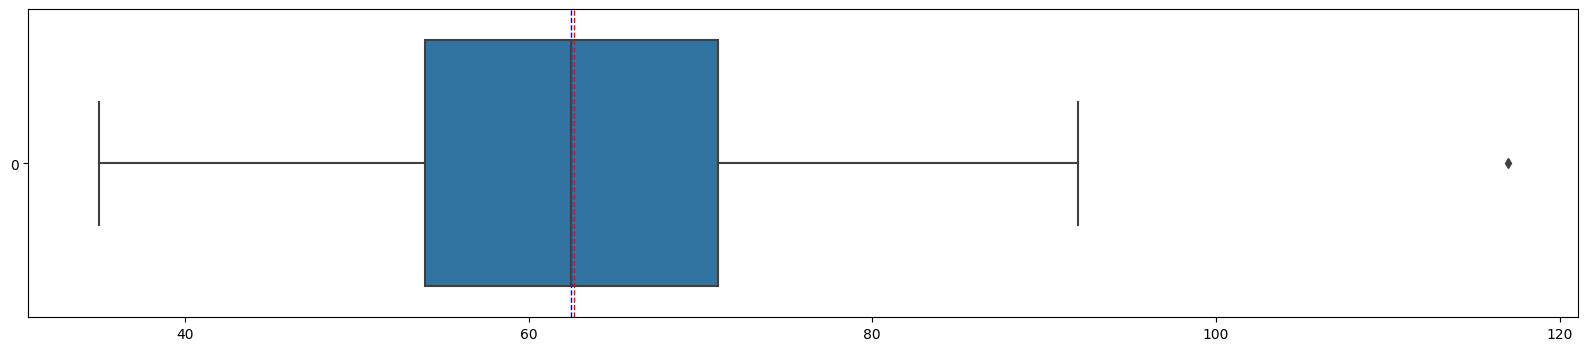

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


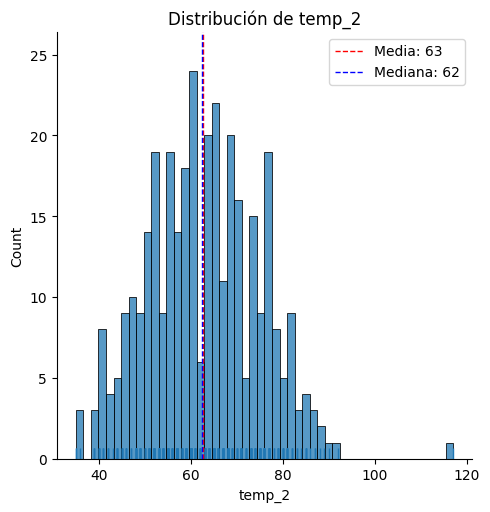

count    348.0
mean      63.0
std       12.0
min       35.0
25%       54.0
50%       62.0
75%       71.0
max      117.0
Name: temp_2, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: temp_1_x



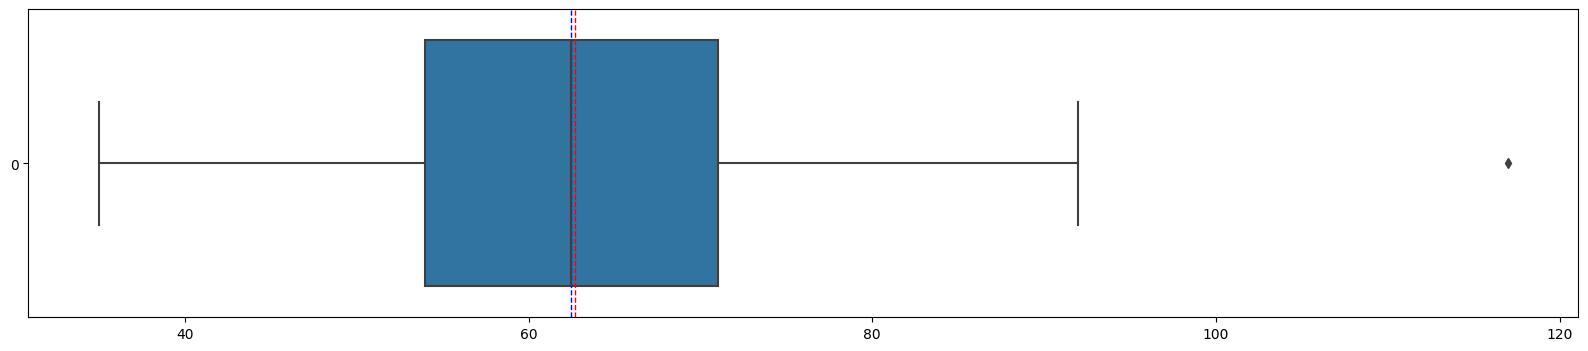

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


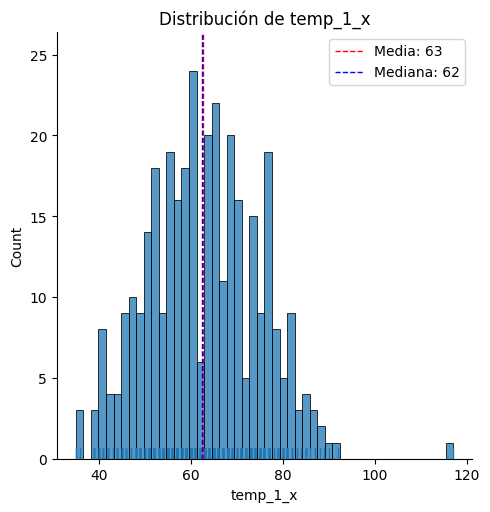

count    348.0
mean      63.0
std       12.0
min       35.0
25%       54.0
50%       62.0
75%       71.0
max      117.0
Name: temp_1_x, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: average



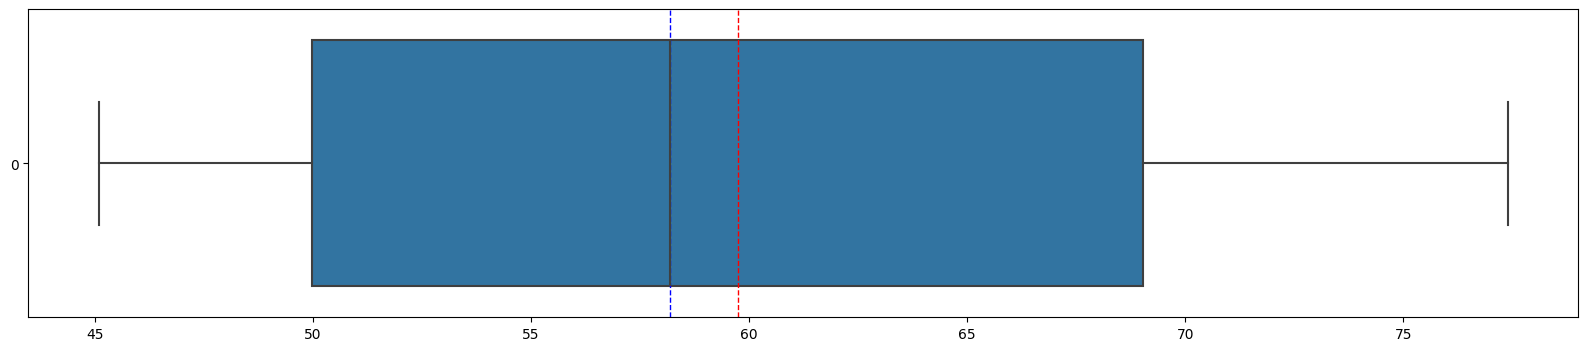

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


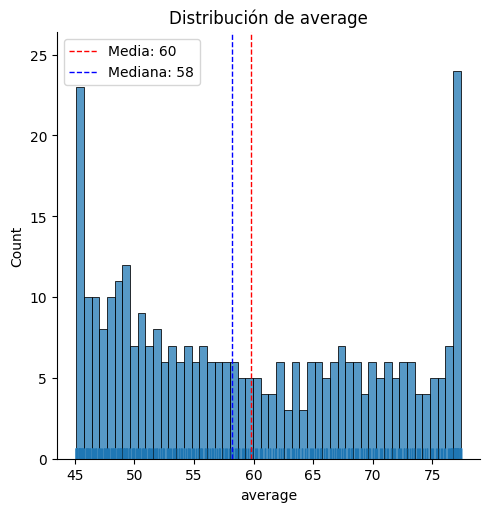

count    348.0
mean      60.0
std       11.0
min       45.0
25%       50.0
50%       58.0
75%       69.0
max       77.0
Name: average, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: actual



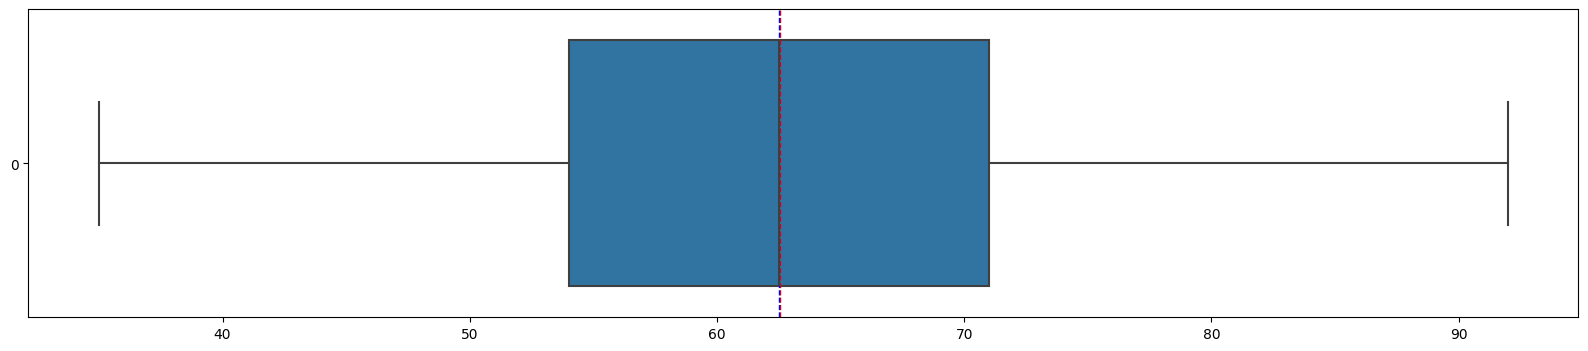

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


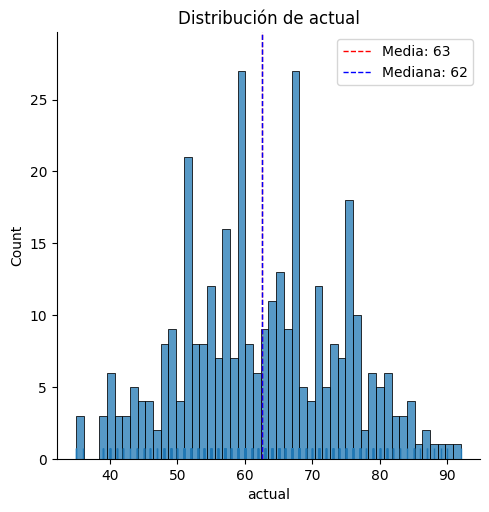

count    348.0
mean      63.0
std       12.0
min       35.0
25%       54.0
50%       62.0
75%       71.0
max       92.0
Name: actual, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: forecast_noaa



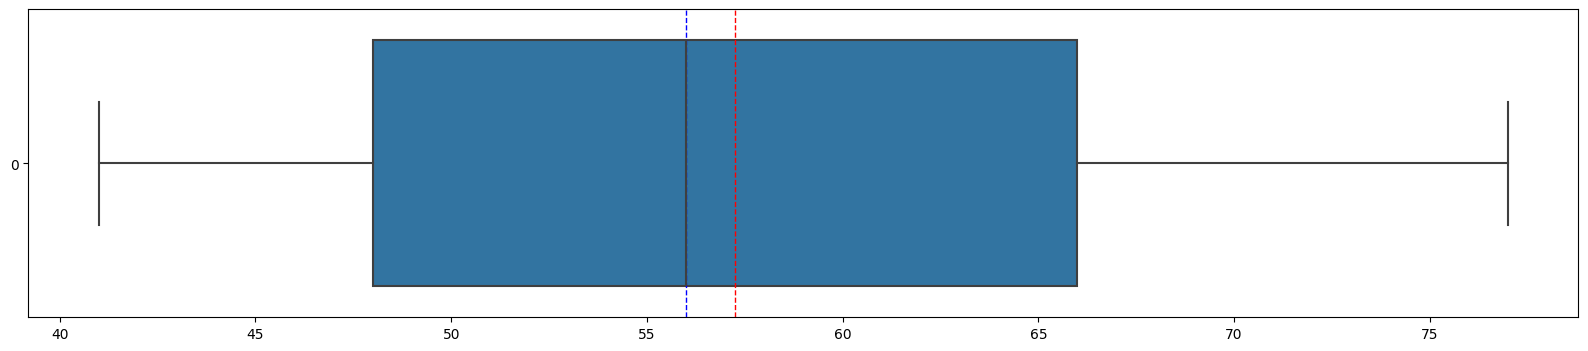

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


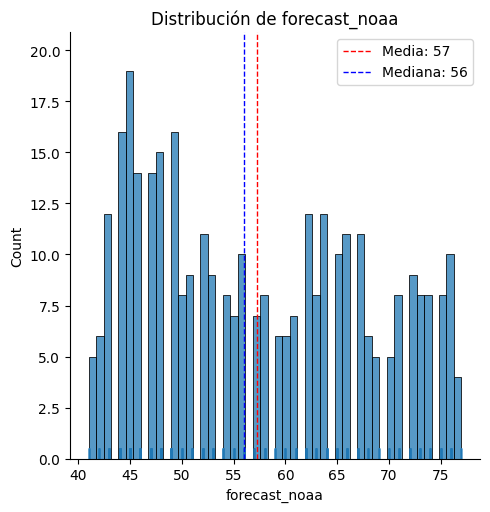

count    348.0
mean      57.0
std       11.0
min       41.0
25%       48.0
50%       56.0
75%       66.0
max       77.0
Name: forecast_noaa, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: forecast_acc



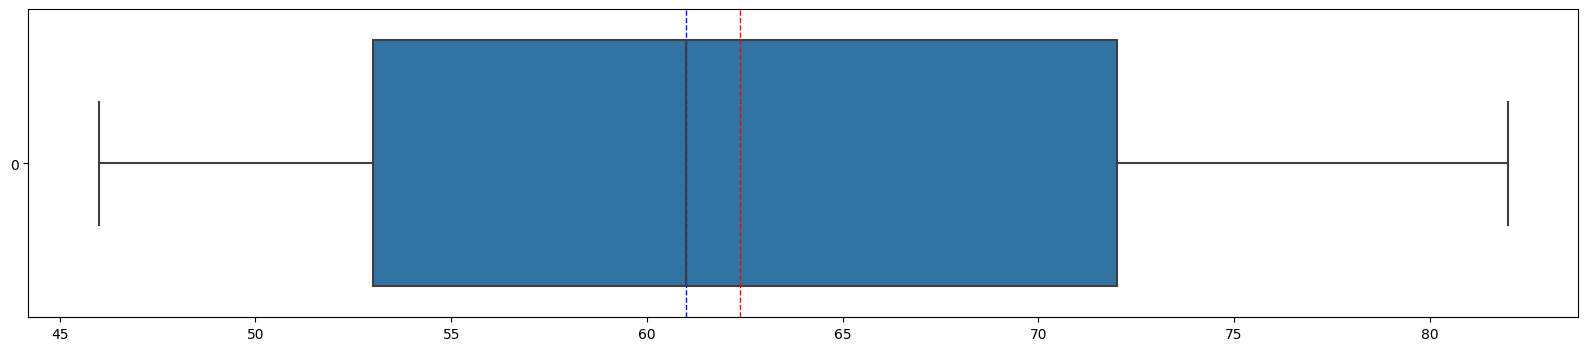

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


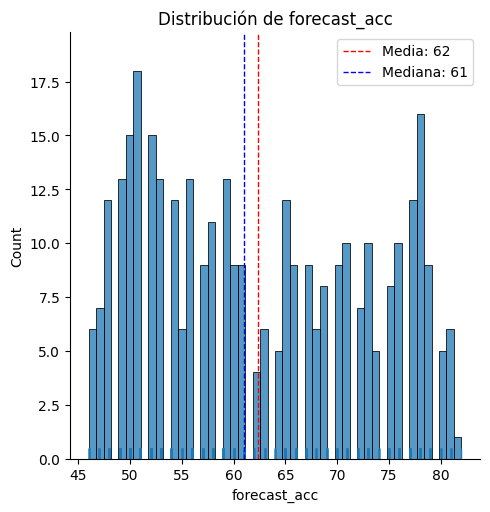

count    348.0
mean      62.0
std       11.0
min       46.0
25%       53.0
50%       61.0
75%       72.0
max       82.0
Name: forecast_acc, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: forecast_under



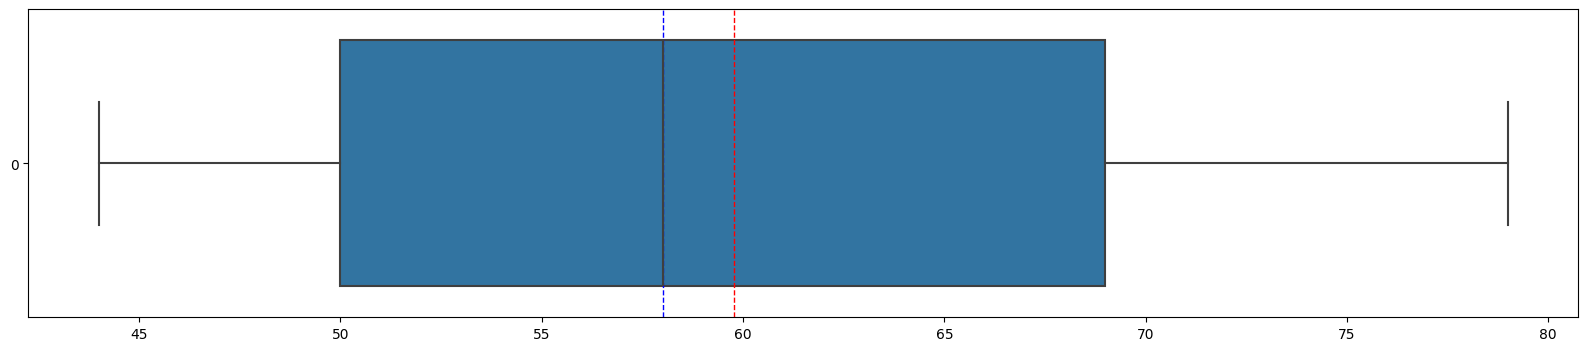

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


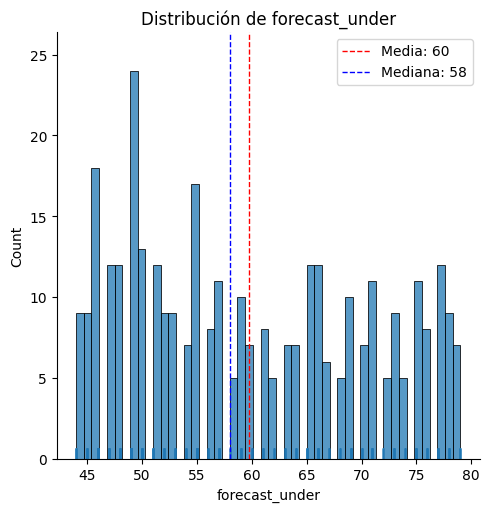

count    348.0
mean      60.0
std       11.0
min       44.0
25%       50.0
50%       58.0
75%       69.0
max       79.0
Name: forecast_under, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: friend



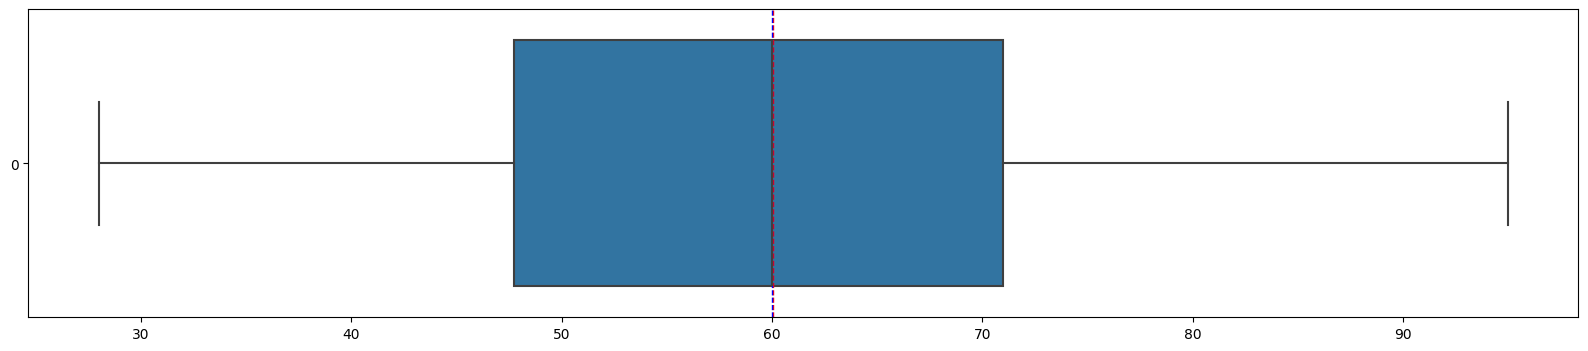

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


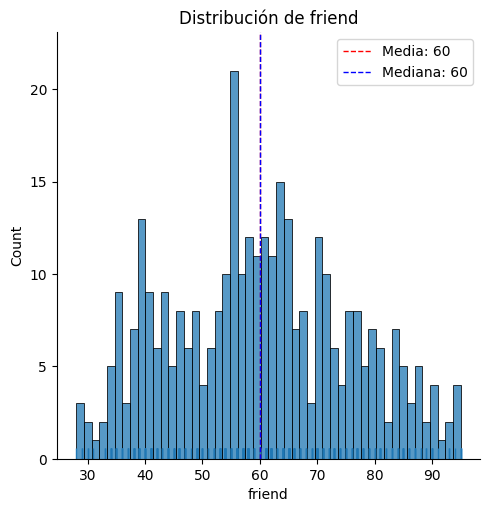

count    348.0
mean      60.0
std       16.0
min       28.0
25%       48.0
50%       60.0
75%       71.0
max       95.0
Name: friend, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: temp_1_y



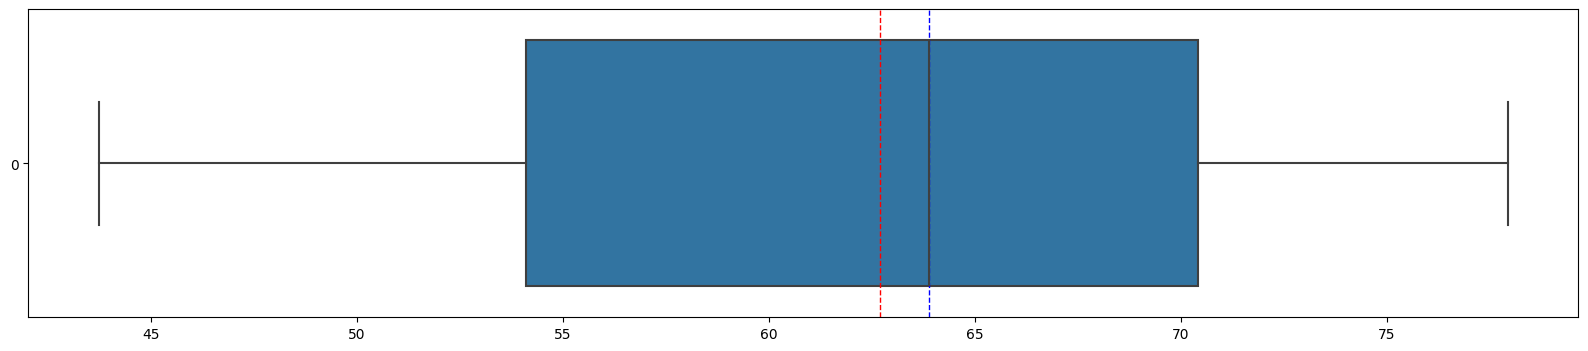

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


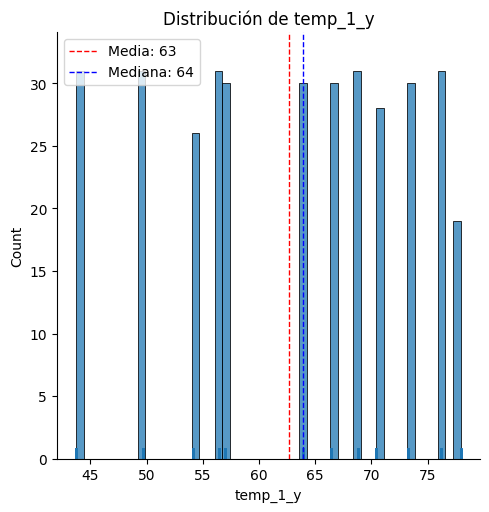

count    348.0
mean      63.0
std       10.0
min       44.0
25%       54.0
50%       64.0
75%       70.0
max       78.0
Name: temp_1_y, dtype: float64
------------------------------------------------------------


In [373]:
graficos_variables_cuant(df)

In [374]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

### 3. Divide en train y test

In [375]:
X = df[['month', 'temp_2', 'temp_1_x', 'average','forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y']]
y = df[['actual']]

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [377]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 9)
y_train:  (278, 1)
X_test:  (70, 9)
y_test:  (70, 1)


### 4. Entrena el modelo


In [378]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(random_state=75)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=75)

In [379]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [380]:
dtr.feature_importances_

array([0.02026489, 0.0242322 , 0.76654389, 0.10567422, 0.01146652,
       0.01912528, 0.03503746, 0.01373513, 0.00392042])

In [381]:
y_pred = dtr.predict(X_test)
y_pred

array([79., 68., 57., 68., 72., 76., 73., 79., 71., 82., 68., 65., 39.,
       60., 75., 55., 58., 57., 57., 65., 59., 57., 70., 60., 64., 49.,
       66., 45., 60., 82., 71., 68., 57., 79., 73., 60., 51., 48., 74.,
       40., 77., 57., 81., 40., 60., 76., 55., 87., 52., 39., 40., 39.,
       67., 64., 74., 61., 55., 61., 56., 53., 67., 46., 60., 71., 71.,
       59., 71., 68., 80., 39.])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [382]:
y_pred

array([79., 68., 57., 68., 72., 76., 73., 79., 71., 82., 68., 65., 39.,
       60., 75., 55., 58., 57., 57., 65., 59., 57., 70., 60., 64., 49.,
       66., 45., 60., 82., 71., 68., 57., 79., 73., 60., 51., 48., 74.,
       40., 77., 57., 81., 40., 60., 76., 55., 87., 52., 39., 40., 39.,
       67., 64., 74., 61., 55., 61., 56., 53., 67., 46., 60., 71., 71.,
       59., 71., 68., 80., 39.])

In [383]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False)) #te saca directamente el valor sin la raiz cuadrada
# print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6835847646626112
MAE 5.357142857142857
MAPE 0.08520867933793548
MSE 44.24285714285714
RMSE 6.65153043613702


#### Evalua con los datos que ya tenemos si esta haciendo overfittig o no, en este caso acierta todos los valores por lo que se lo aprende de memoria

In [384]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", mean_squared_error(y_train, dtr.predict(X_train), squared=False)) #te saca directamente el valor sin la raiz cuadrada
# print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

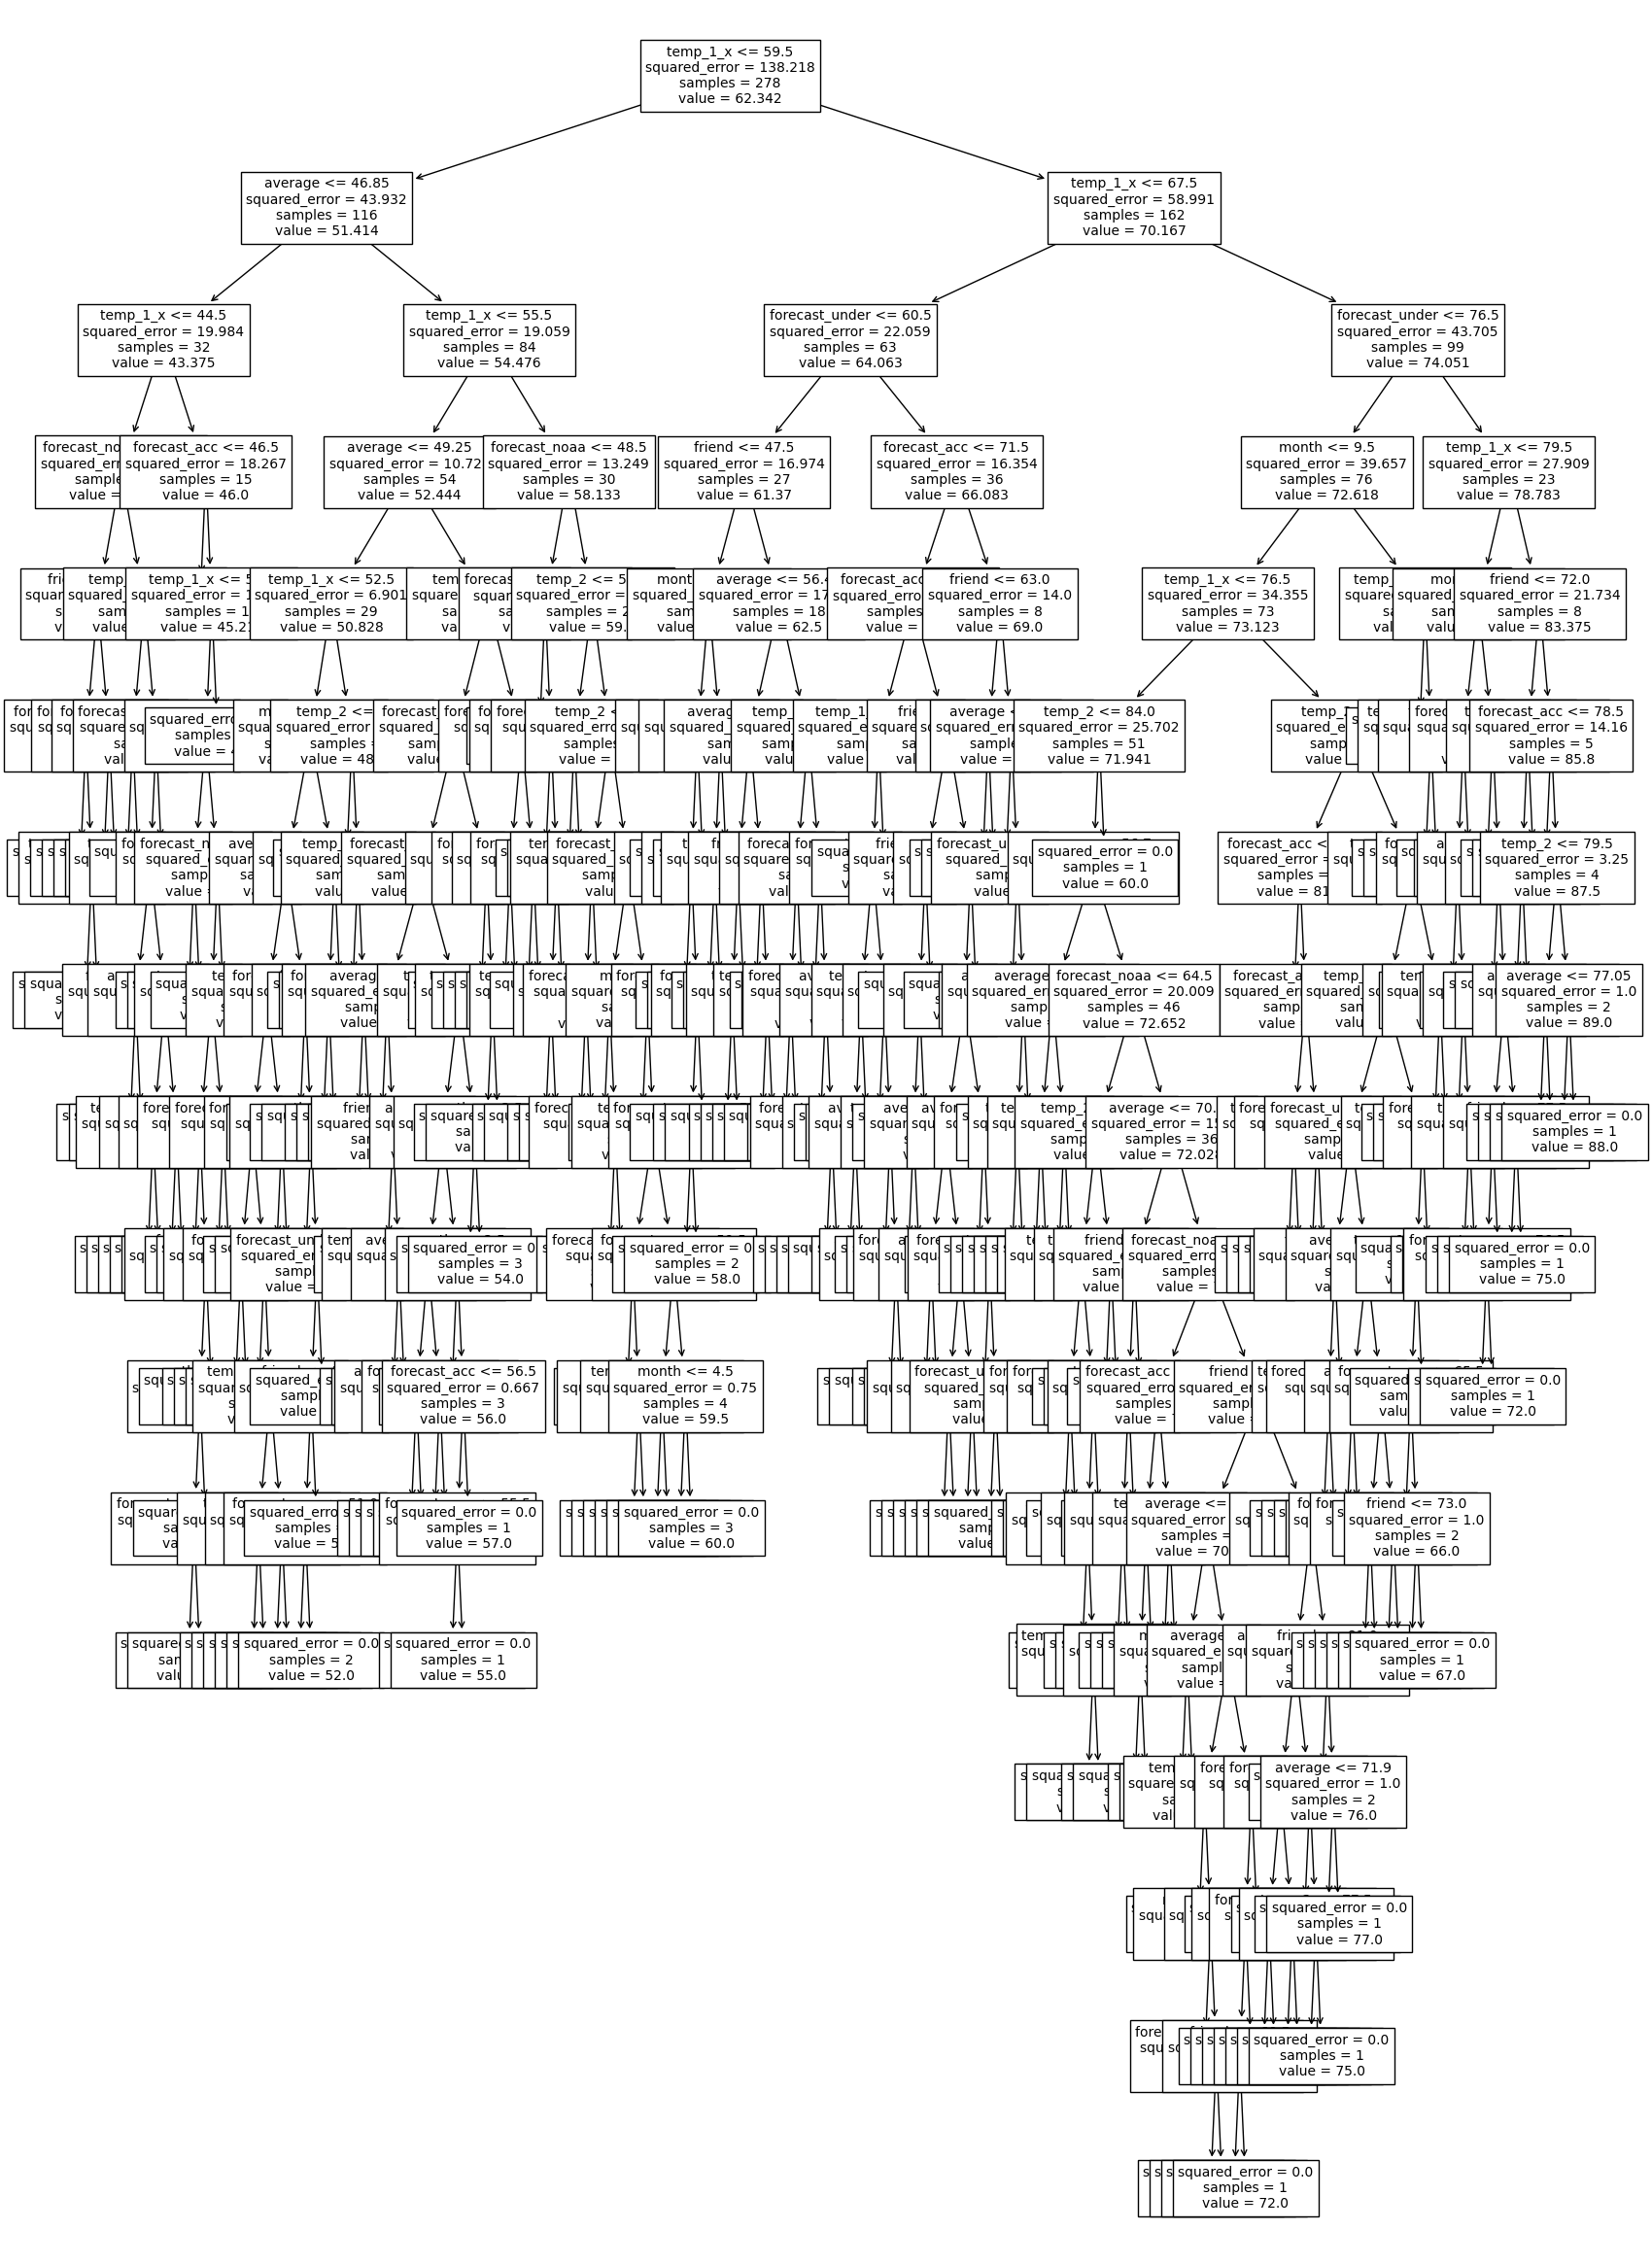

In [385]:
plt.figure(figsize=(20,30))
plot_tree(dtr, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [386]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier

dtr_3 = DecisionTreeClassifier(max_depth=3, random_state=75)
dtr_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=75)

### 8. Vuelve a evaluar tu modelo

In [387]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False))

Coeficiente determinación 0.5693606015669699
MAE 5.614285714285714
MAPE 0.08503549091125537
MSE 60.214285714285715
RMSE 7.7597864477243


### 9. Vuelve a representar su árbol

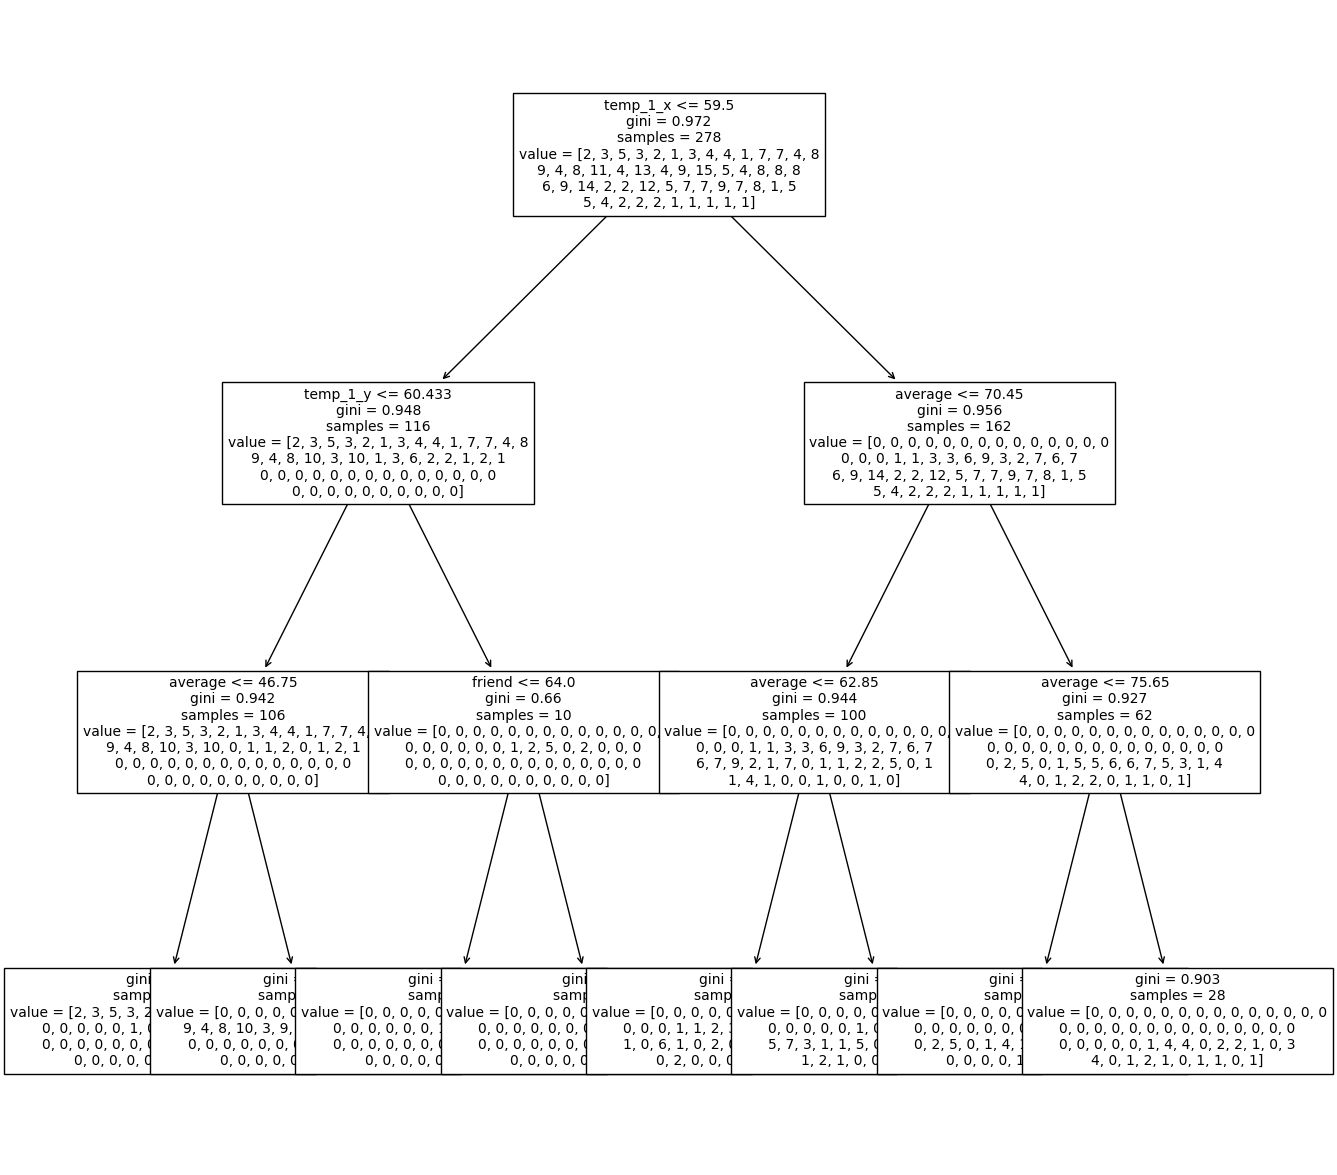

In [388]:
plt.figure(figsize=(15,15))
plot_tree(dtr_3, feature_names = X_train.columns, fontsize=10);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [389]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.24673093, 0.48418937, 0.        ,
       0.        , 0.        , 0.10775867, 0.16132103])

In [390]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [391]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
3,average,0.484189
2,temp_1_x,0.246731
8,temp_1_y,0.161321
7,friend,0.107759
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
6,forecast_under,0.000000


In [392]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [393]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=75)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=75)

In [394]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.5693606015669699
MAE 5.614285714285714
MAPE 0.08503549091125537
MSE 60.214285714285715
RMSE 7.7597864477243


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [395]:
df['target_class'] = np.where(df['actual'] > 59, 1, 0)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

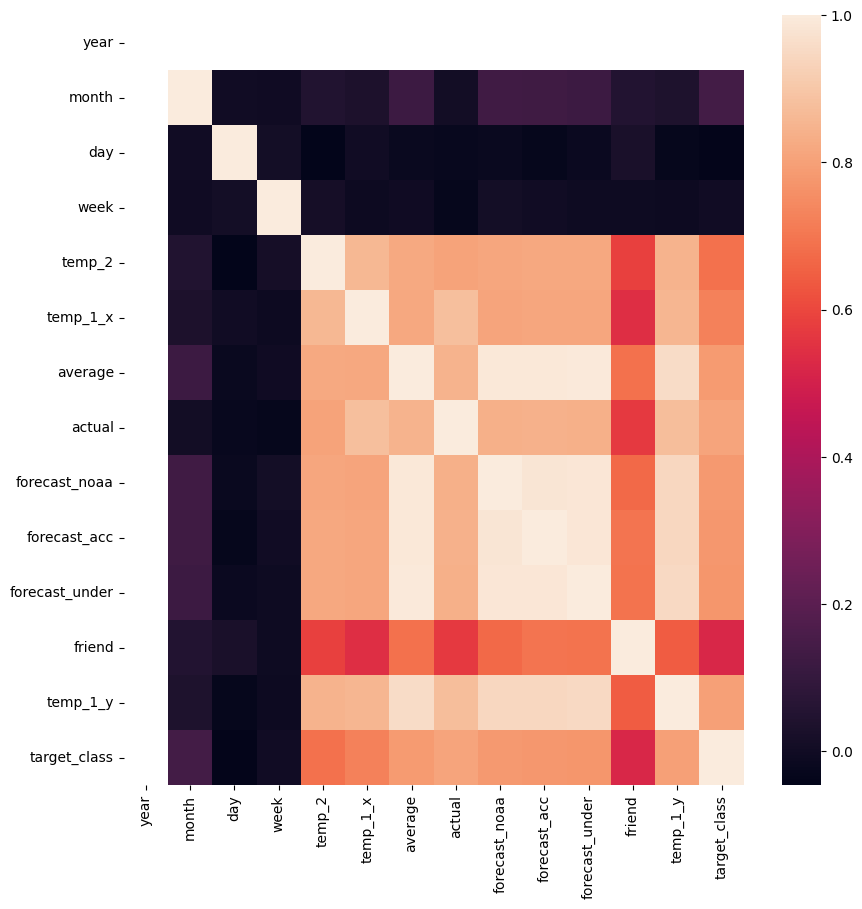

In [396]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [398]:
df['target_class'].value_counts()

target_class
1    204
0    144
Name: count, dtype: int64

In [399]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_class']), df['target_class'], test_size=0.2, random_state=42)

In [401]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=75)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=75)

In [402]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [403]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 , 0.        ])

In [404]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9142857142857143

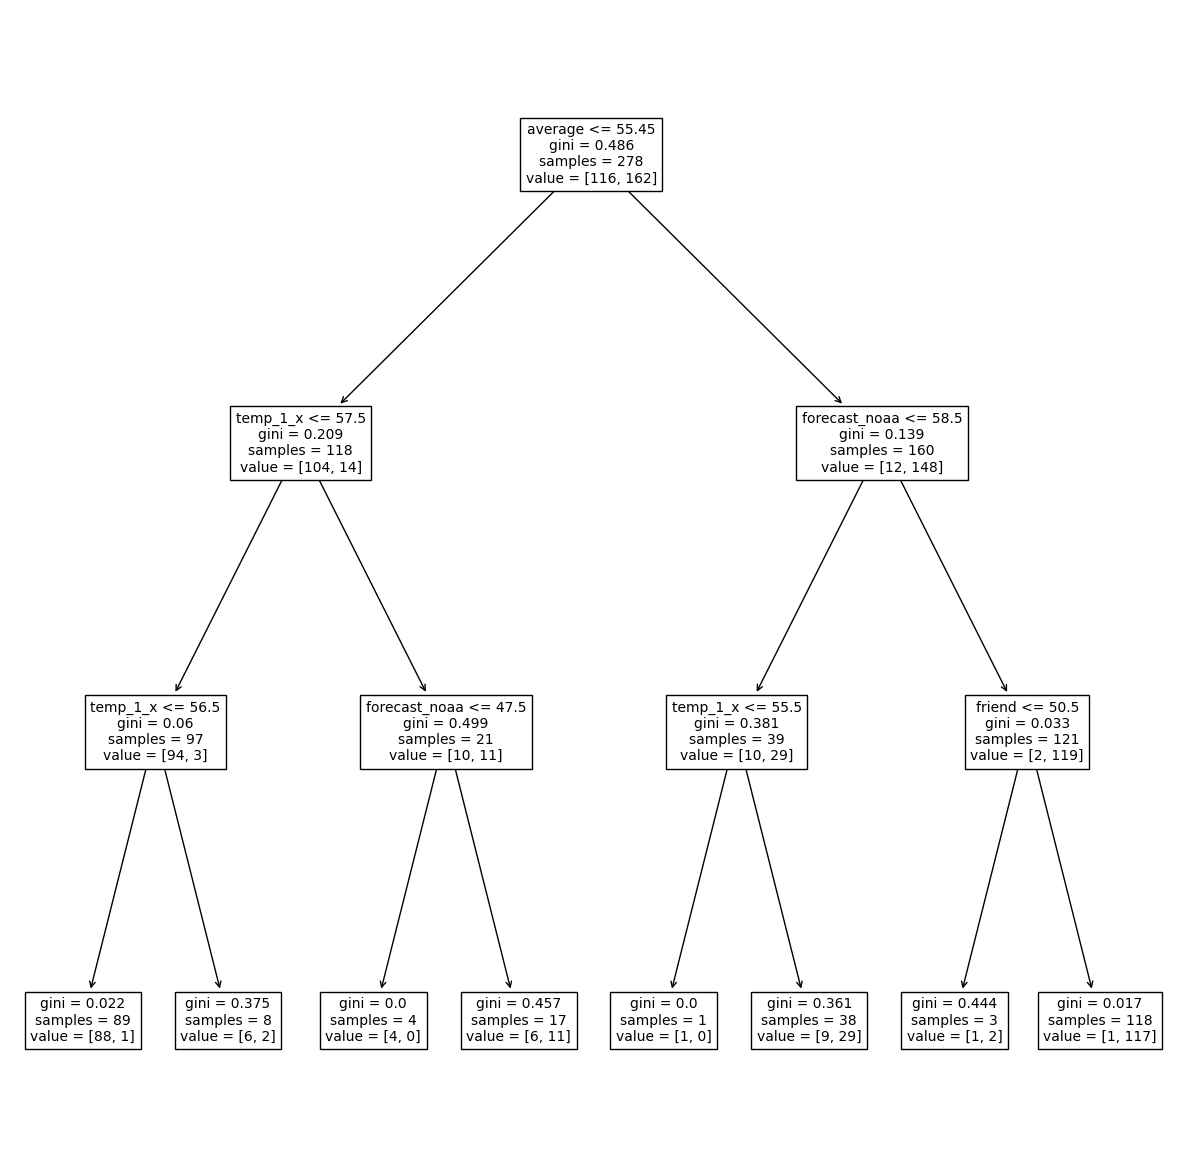

In [405]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, fontsize=10); #max_depth cambia la profundidad de la visualización

In [406]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

0.9142857142857143

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

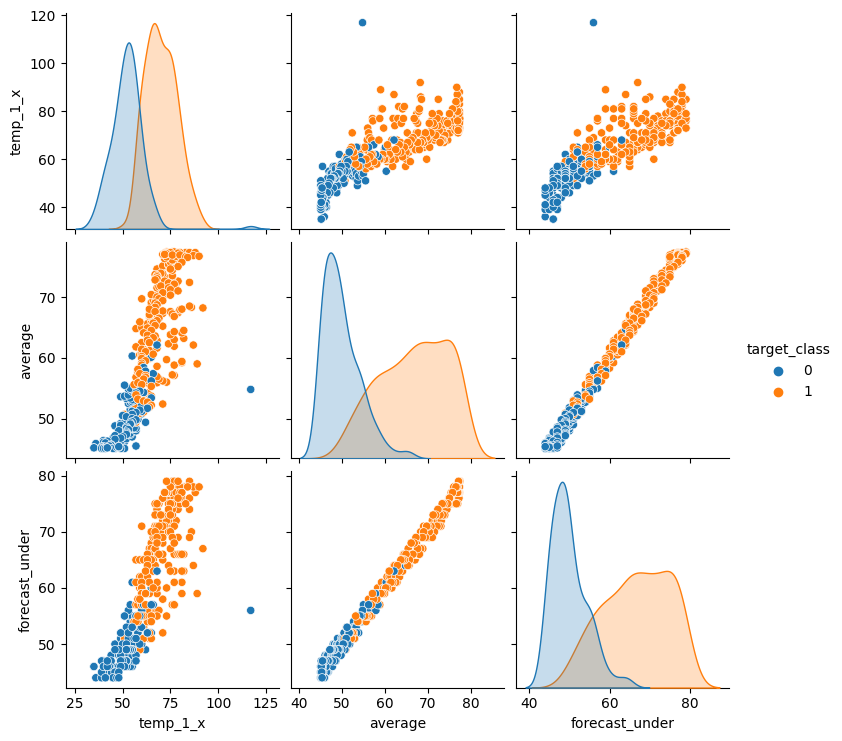

In [409]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_class']], hue='target_class')